In [21]:
from mylinearregression import MyLinearRegression as MyLR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def plot(x, y, y_hat, labels, colors):
    try:
        plt.plot(x, y, 'o', color=colors[0], label=labels[0])
        plt.plot(x, y_hat, '.', color=colors[1], label=labels[1])
        plt.xlabel(labels[2])
        plt.ylabel(labels[3])
        plt.legend()
        plt.show()
    except Exception as err:
        print(err)

In [3]:
def univar(x, y, thetas, alpha, max_iter, labels, colors):
    try:
        print("--- {0} ---".format(labels[2]))
        lm = MyLR(thetas, alpha=alpha, max_iter=max_iter)
        lm.fit_(x, y)
        y_pred = lm.predict_(x)
        mse = lm.loss_(y, y_pred)
        print("Thetas:")
        print(lm.thetas)
        print("Score: {0}".format(mse))
        plot(x, y, y_pred, labels, colors)
    except Exception as err:
        print(err)

In [4]:
data = pd.read_csv("../ressources/spacecraft_data.csv")

x = np.array(data[['Age', 'Thrust_power', 'Terameters']])
y = np.array(data['Sell_price']).reshape(-1, 1)

x_0 = np.array(data['Age']).reshape(-1, 1)
x_1 = np.array(data['Thrust_power']).reshape(-1, 1)
x_2 = np.array(data['Terameters']).reshape(-1, 1)


# Part One: Univariate Linear Regression

## Hyperparameters

In [5]:
alpha=0.0001
max_iter=1000

## Age

--- $x_1$: age (in years) ---
Thetas:
[[698.17136856]
 [-17.2287428 ]]
Score: 24387.010639784923


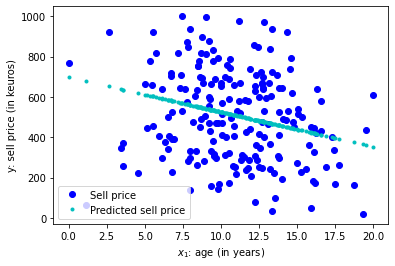

In [6]:
univar(x_0, y, np.array([[700.0], [-1]]), alpha, max_iter,
        ['Sell price', 'Predicted sell price', "$x_1$: age (in years)", "y: sell price (in keuros)"],
        ['b', 'c'])

## Thrust

--- $x_2$: thrust power (in 10Km/s) ---
Thetas:
[[99.36616768]
 [ 3.83145738]]
Score: 12893.668983953448


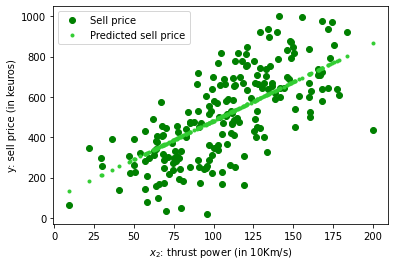

In [7]:
univar(x_1, y, np.array([[100], [5.0]]), alpha, max_iter,
        ['Sell price', 'Predicted sell price', "$x_2$: thrust power (in 10Km/s)", "y: sell price (in keuros)"],
        ['g', 'limegreen'])

## Total distance

--- $x_3$: distance totalier value of spacecraft (in Tmeters) ---
Thetas:
[[504.89624877]
 [ -0.56721614]]
Score: 23907.083456254797


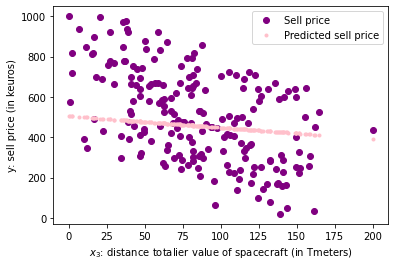

In [8]:
univar(x_2, y, np.array([[500.0], [-10]]), alpha, max_iter,
        ['Sell price', 'Predicted sell price', "$x_3$: distance totalier value of spacecraft (in Tmeters)", "y: sell price (in keuros)"],
        ['purple', 'pink'])

# Part Two: Multivariate Linear Regression (A New Hope)

## Hyperparameters

In [25]:
alpha = 0.00001
max_iter = 600000
thetas = [1.0, 1.0, 1.0, 1.0]
MyLR.normal_eq(x, y)

AttributeError: type object 'MyLinearRegression' has no attribute 'normal_eq'

## Model

In [10]:
lm = MyLR(thetas, alpha=alpha, max_iter=max_iter)
lm.fit_(x, y)
y_pred = lm.predict_(x)
mse = lm.loss_(y, y_pred)

## Print 

In [11]:
print("Thetas:")
print(lm.thetas)
print("Score: {0}".format(mse))

Thetas:
[[128.99038046]
 [-15.10948381]
 [  6.62991997]
 [ -2.25407409]]
Score: 2436.31247572346


## Plot

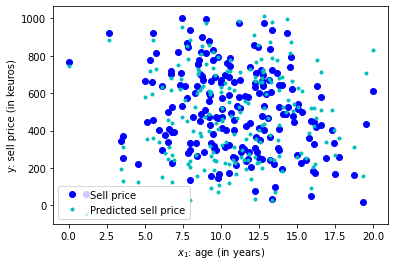

In [12]:
plot(x_0, y, y_pred, ['Sell price', 'Predicted sell price', "$x_1$: age (in years)", "y: sell price (in keuros)"],
        ['b', 'c'])

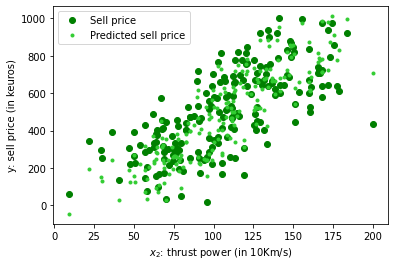

In [13]:
plot(x_1, y, y_pred, ['Sell price', 'Predicted sell price', "$x_2$: thrust power (in 10Km/s)", "y: sell price (in keuros)"],
        ['g', 'limegreen'])

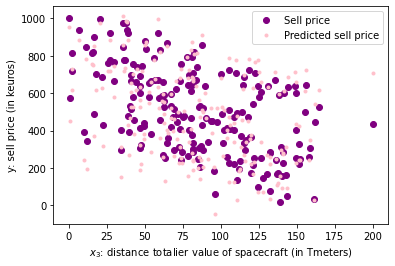

In [14]:
plot(x_2, y, y_pred, ['Sell price', 'Predicted sell price', "$x_3$: distance totalier value of spacecraft (in Tmeters)", "y: sell price (in keuros)"],
        ['purple', 'pink'])